# Simulation 1.1 - Training the agents


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv as SQLenv
import agent as agn

## Defining the parameters of the simulations

In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2

exploration_train = 0.1
exploration_test = 0
learningrate = 0.1
discount = 0.9
max_steps = 1000

flag_reward = 10
query_reward = -1

## Running the simulations

In [3]:
train_data = np.zeros((n_simulations,3,n_episodes_training))
test_data = np.zeros((n_simulations,3,n_episodes_test))

for i in tqdm(range(n_simulations)):
    agt = agn.Agent(const.actions,verbose=False)
    agt.set_learning_options(exploration=exploration_train, learningrate=learningrate, discount=discount, max_step = max_steps)
    
    for e in tqdm(range(n_episodes_training)):
        env = SQLenv.mockSQLenv(verbose=False, flag_reward=flag_reward, query_reward=query_reward)

        agt.reset(env)
        agt.run_episode()

        train_data[i,0,e] = agt.steps
        train_data[i,1,e] = agt.rewards
        train_data[i,2,e] = ut.getdictshape(agt.Q)[0]
    
    agt.set_learning_options(exploration=exploration_test)
    
    for e in tqdm(range(n_episodes_test)):
        env = SQLenv.mockSQLenv(verbose=False, flag_reward=flag_reward, query_reward=query_reward)

        agt.reset(env)
        agt.run_episode()

        test_data[i,0,e] = agt.steps
        test_data[i,1,e] = agt.rewards
        test_data[i,2,e] = ut.getdictshape(agt.Q)[0]

100%|██████████| 10/10 [4:34:53<00:00, 1649.30s/it]


## Saving the statistics

In [4]:
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
joblib.dump(train_data,'ignore_simul1_traindata_'+timestamp+'.pkl')
joblib.dump(test_data,'ignore_simul1_testdata_'+timestamp+'.pkl')

['ignore_simul1_testdata_20230617221402399323.pkl']

## Analyzing the agent

We plot the variation in the number of states in the Q-matrix

Text(0, 0.5, 'number of states')

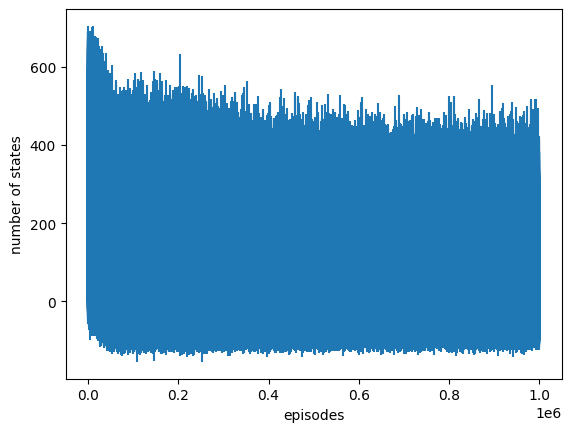

In [5]:
plt.errorbar(range(n_episodes_training),np.mean(train_data[:,0,:],axis=0),yerr=np.std(train_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of states')

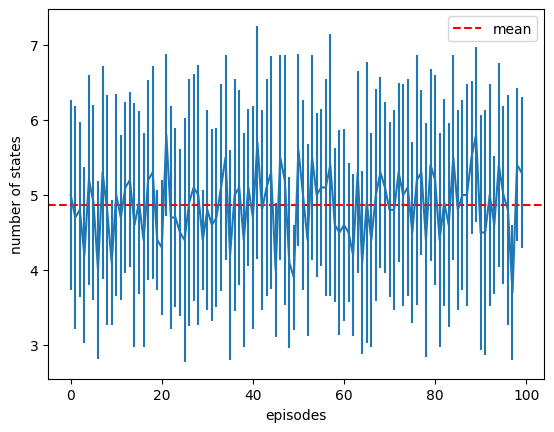

In [6]:
plt.errorbar(range(n_episodes_test),np.mean(test_data[:,0,:],axis=0),yerr=np.std(test_data[:,0,:],axis=0))
plt.xlabel('episodes')
plt.ylabel('number of states')
plt.axhline(np.mean(test_data[:,0,:]),c='red',ls='--',label='mean')
plt.legend()